<a href="https://colab.research.google.com/github/SrikanthDodle/US-Accidents-Exploratory-Data-Analysis-Project/blob/main/US_Accidents_Exploratory_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction:
In today's data-driven world, understanding and harnessing the insights embedded in vast datasets are key elements of informed decision-making. One such dataset of significant interest is the "US Accidents" dataset, sourced from Kaggle. This dataset aggregates information about traffic accidents across the United States, offering a comprehensive overview of various factors contributing to road incidents. While it is not possible to predict accidents, it is quite useful to analyze the conditions under which they happen. It will be helpful to have an overview of the conditions that are controllable.
# Problem Statement:
The primary objective of this Exploratory Data Analysis (EDA) project is to delve into the US Accidents dataset and unearth valuable insights that can aid in improving road safety measures. By meticulously analyzing the wealth of information contained in the dataset.

##Downloading the Dataset
The first step to any data project is to download the data. In this case, the CSV file is directly accessed from Kaggle with the following code-

In [ ]:
!pip install opendatasets --upgrade --quiet

opendataset is used to download online datasets

In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dodlesrikanth
Your Kaggle Key: ··········


100%|██████████| 653M/653M [00:19<00:00, 36.0MB/s]


In [ ]:
filename = '/content/us-accidents/US_Accidents_March23.csv'

##Data Preparation & Cleaning

After getting hold of the data, the following steps are needed to make it ready for data analysis and visualization-

Load the file using Pandas.

Look at preliminary information or summary statistics.

Fix any missing/incorrect values.

In [ ]:
import pandas as pd

# Define the file path
file_path = filename

# Set the chunk size based on your available memory
chunk_size = 100000

# Initialize an empty DataFrame to store the concatenated data
all_data = pd.DataFrame()

# Iterate over chunks and concatenate data
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Process the chunk if needed
    # For example, you can perform operations on each chunk

    # Append the chunk to the result DataFrame
    all_data = pd.concat([all_data, chunk], ignore_index=True)

# Optionally, reset the index if needed
all_data.reset_index(drop=True, inplace=True)

# Display the shape of the concatenated dataset
print("Shape of the concatenated dataset:", all_data.shape)



Shape of the concatenated dataset: (7728394, 46)


dataset contains 7.7 Million records

In [ ]:
all_data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df = all_data

Columns of the Dataset

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Overview of the data types for each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

Summary statistics of the columns

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


Now Let's look into Missing Values

In [ ]:
df.isna().sum().sort_values(ascending = False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

Percentage share of missing values for each column in the entire data

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending = False)/len(df)

Remove the which don't have any missing values and plot it.

In [ ]:
missing_percentages = missing_percentages[missing_percentages != 0]
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

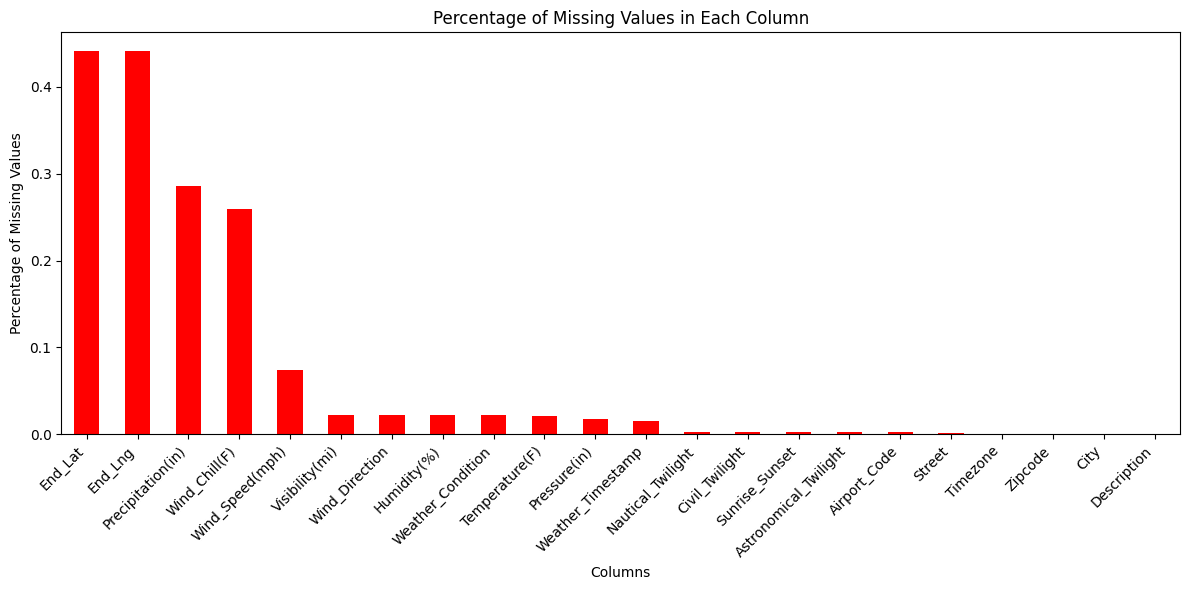

In [ ]:
import matplotlib.pyplot as plt
# Plot the missing value percentages
plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Data Analysis and Visualization

Once the data is cleaned and prepared for analysis, we take some of the columns and apply statistical methods to see the underlying picture come to the surface. The following columns have been analyzed in this project-

State

City

Start Time

Temperature

Weather Condition

Crossing

Traffic Signal

Bump

Start_Lan and Start_Lat

**State**
The column lists down the name of the US state found in the address of the accident. We want to see the top 10 states by the number of accidents.

In [ ]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object

Let’s look at the top ten states by the number of accidents. To do this, we need the absolute number of accidents against each state.

In [ ]:
top_states = df['State'].value_counts().head(10)
top_states

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: State, dtype: int64

Clearly, a significant number of accidents have happened in California, Florida, Texas, South Carolina and New York.

Now we will plot a bar chart for the top ten states with most accidents

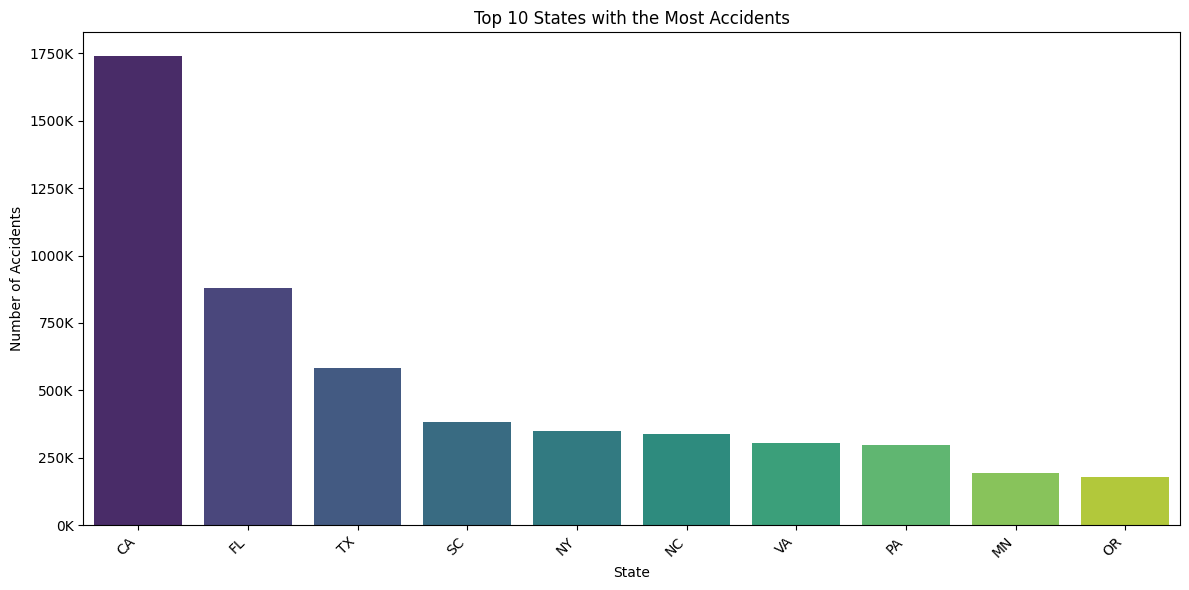

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_states.index, y=top_states, palette='viridis')
# Customize the y-axis labels using FuncFormatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))

plt.title('Top 10 States with the Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**City**

In [ ]:
#City column
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

Check accidents for each city

In [ ]:
accidents_by_cities = df.City.value_counts()
accidents_by_cities

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

Top 15 cities with most accidents

In [ ]:
top_cities = accidents_by_cities[:15]

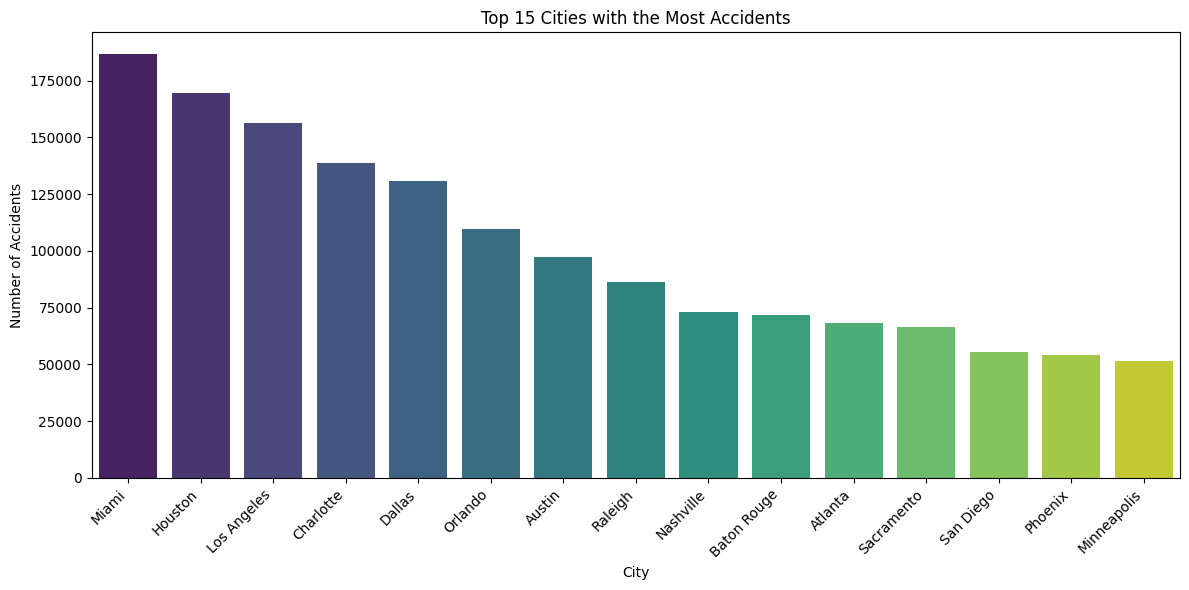

In [ ]:
#Plot
import seaborn as sns
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities, palette='viridis')
plt.title('Top 15 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

distribution of cities by the number of accidents

<Axes: xlabel='City', ylabel='Count'>

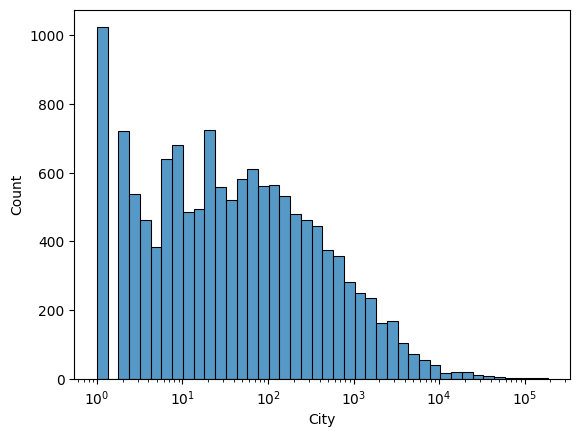

In [ ]:
sns.histplot(accidents_by_cities, log_scale =True)

**Start Time**

In [ ]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [ ]:
#convert to timestamp type and override the original column
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

We want to know what time of the day witnesses more accidents. To do this, we pull the hour from the timestamp format above

In [ ]:
#extract hour from timestamp
df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int64

Check at which hour more accidents are happening

<Axes: xlabel='Start_Time', ylabel='Count'>

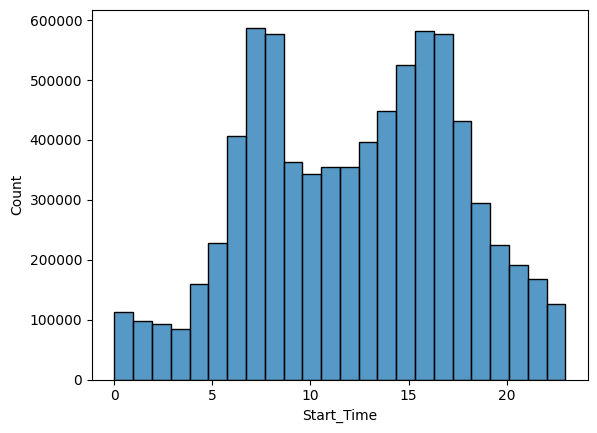

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

**There are two peaks of time- one in the morning in** **between 6 am to 10 am and another between 3 pm and 6 pm**. This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents

Accidents frequency based on day of the week

<Axes: xlabel='Start_Time', ylabel='Count'>

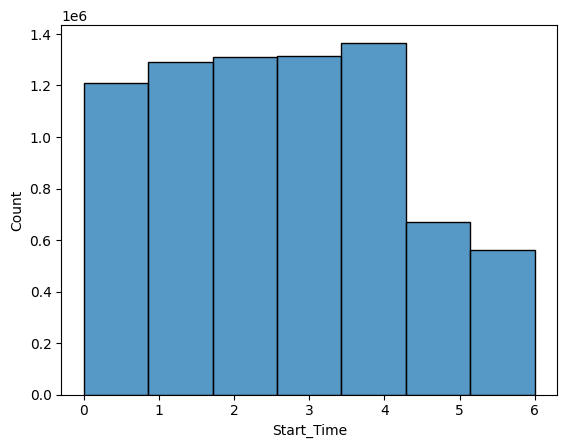

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7)

There is equal amount distribution of Accidents over weekdays. **There are less Accidents on Weekends**

Monthly distribution of accidents

<Axes: xlabel='Start_Time', ylabel='Count'>

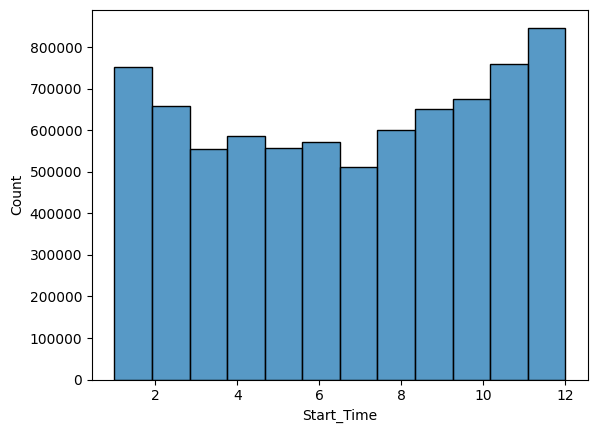

In [ ]:
#Accidents frequency based on months
sns.histplot(df.Start_Time.dt.month, bins=12)

Looks like **during winter months there is sligtly higher number of accidents**

Now we'll Analyze the distribution of accidents by months for each year

Text(0.5, 1.0, 'Accidents frequency based on months for 2016')

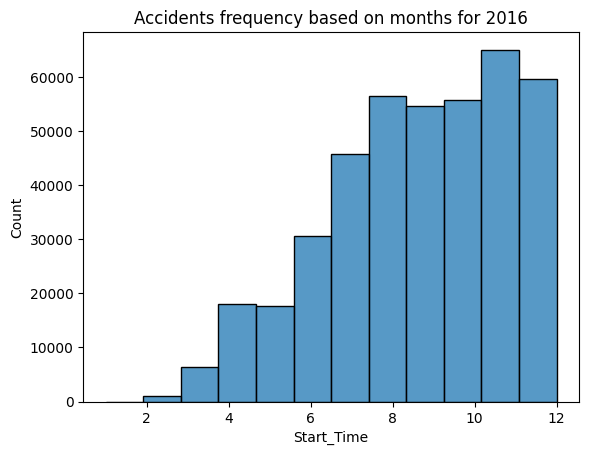

In [ ]:
#Now analyze year by year
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_2016.Start_Time.dt.month, bins=12)
plt.title('Accidents frequency based on months for 2016')

Looks like there is missing data in 1st quarter of the year 2016 or it may be data was not collected

Text(0.5, 1.0, 'Accidents frequency based on months for 2023')

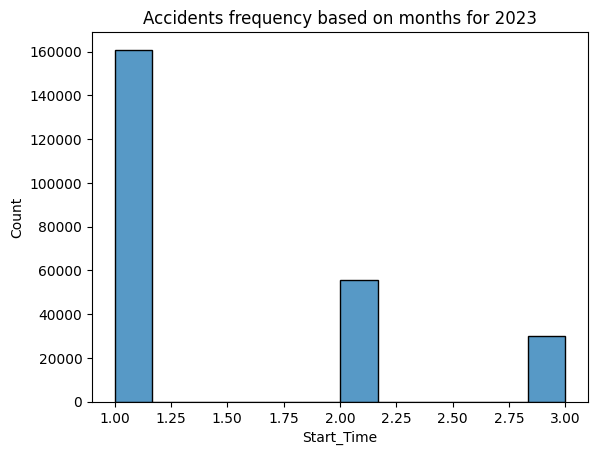

In [ ]:
df_2023 = df[df.Start_Time.dt.year == 2023]
sns.histplot(df_2023.Start_Time.dt.month, bins=12)
plt.title('Accidents frequency based on months for 2023')

**Year 2023 have the data only for 1st quarter**

Text(0.5, 1.0, 'Accidents frequency based on months for 2021')

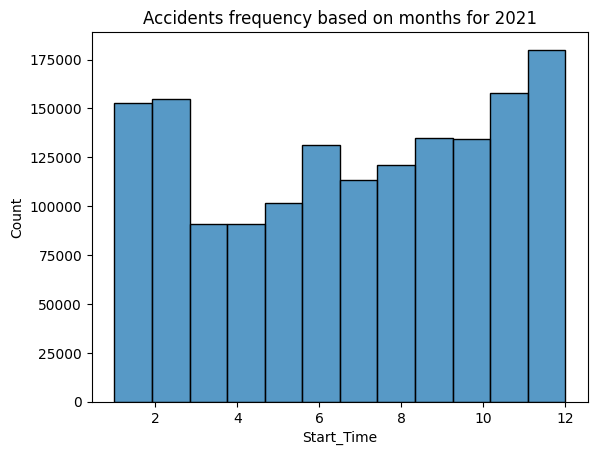

In [ ]:
df_2021 = df[df.Start_Time.dt.year == 2021]
sns.histplot(df_2021.Start_Time.dt.month, bins=12)
plt.title('Accidents frequency based on months for 2021')

Text(0.5, 1.0, 'Accidents frequency based on months for 2022')

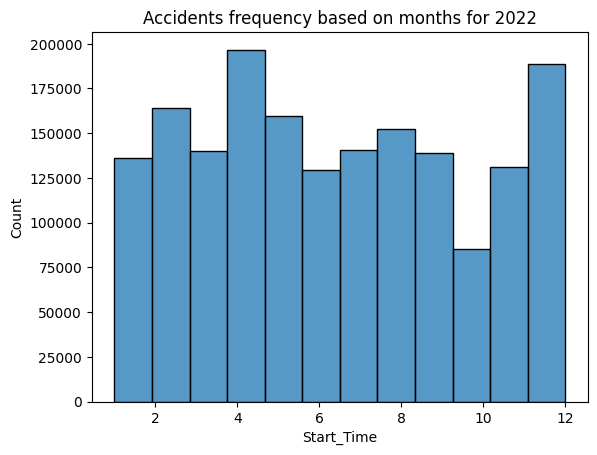

In [ ]:
df_2022 = df[df.Start_Time.dt.year == 2022]
sns.histplot(df_2022.Start_Time.dt.month, bins=12)
plt.title('Accidents frequency based on months for 2022')

**In year 2022, the distribution is equal for 3 quarters**

**Temperature**
This column recorded temperature at the time of the accident in degrees Fahrenheit.

In [ ]:
#pull out the column with its frequency disribution
df['Temperature(F)'].value_counts()

 77.0     170991
 73.0     170898
 68.0     163767
 72.0     160498
 75.0     158448
           ...  
 1.6           1
-21.5          1
 127.0         1
 158.0         1
 132.6         1
Name: Temperature(F), Length: 860, dtype: int64

Let’s visualize the above in a boxplot

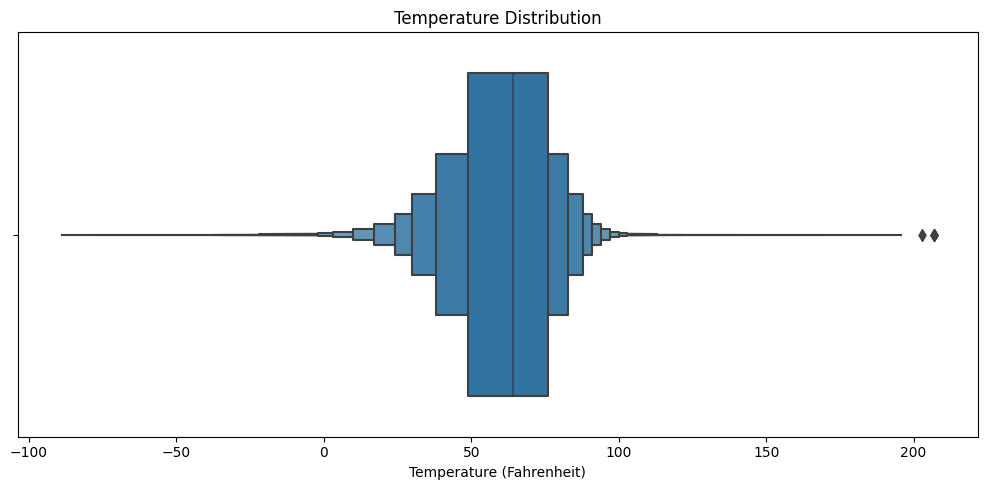

In [ ]:
# Plot a box plot for temperature distribution
plt.figure(figsize=(10, 5))
sns.boxenplot(x=df['Temperature(F)'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Fahrenheit)')
plt.tight_layout()
plt.show()

Accidents happens to be in areas experiencing temperatures in the range of (50–70) degrees Fahrenheit. Most accidents occur in colder weather or regions.

**Weather Condition**
This column has the description of the weather condition at the time of the accident, such as, “Fair”, “Cloudy”, “Clear” etc.

In [ ]:
df.Weather_Condition.value_counts()

Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: Weather_Condition, Length: 144, dtype: int64

build a word cloud to see which word is the most frequent

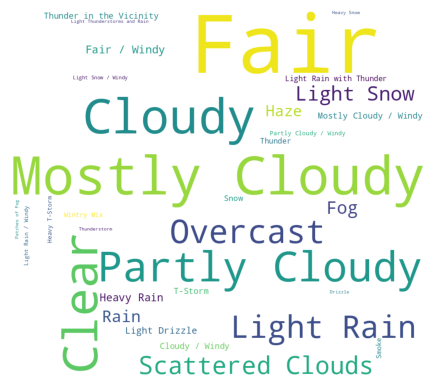

In [ ]:
from wordcloud import WordCloud
data = df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800,
background_color ='white',
min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

The most frequently used word is “Fair”, followed by “Mostly Cloudy” followed by “Clear” and "Clear".

**Crossing**

This column records the presence of a crossing nearby at the point of the accident. “True” and “False” values is best visualized in a pie-chart

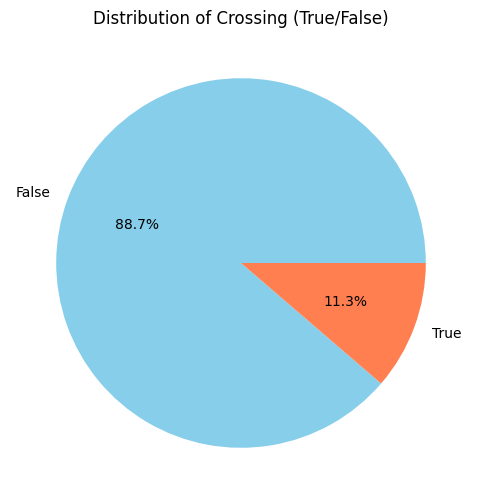

In [ ]:
# Plot a pie chart for the 'Crossing' column
plt.figure(figsize=(6, 6))
df['Crossing'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'coral'])
plt.title('Distribution of Crossing (True/False)')
plt.ylabel('')  # Remove the default 'Crossing' label on the y-axis
plt.show()

**Traffic Signal**

A binary column indicating the presence of a traffic signal nearby the spot of the accident.

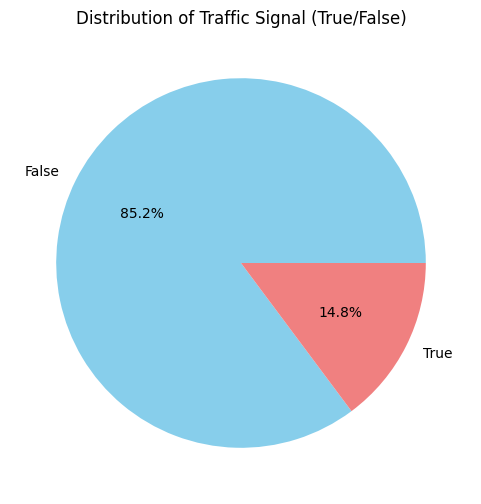

In [ ]:
# Plot a pie chart for the 'Traffic_Signal' column
plt.figure(figsize=(6, 6))
df['Traffic_Signal'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Traffic Signal (True/False)')
plt.ylabel('')  # Remove the default 'Traffic_Signal' label on the y-axis
plt.show()

Almost 15% accidents are due to poor traffic management.

**Bump**

A binary column indicating the presence of a speed bump nearby the spot of the accident.

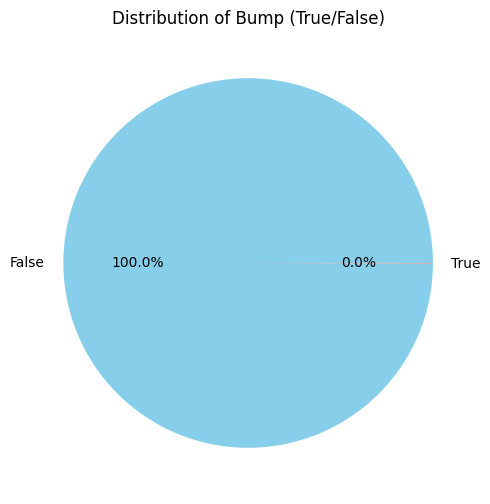

In [ ]:
# Plot a pie chart for the 'Bump' column
plt.figure(figsize=(6, 6))
df['Bump'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Bump (True/False)')
plt.ylabel('')  # Remove the default 'Bump' label on the y-axis
plt.show()

**There is no Bumps near Accidents regions**

Now Lattitude and Longitude Analysis

In [ ]:
df.Start_Lat

0          41.946796
1          34.521172
2          37.542839
3          40.896629
4          41.409359
             ...    
5459416    34.002480
5459417    32.766960
5459418    33.775450
5459419    33.992460
5459420    34.133930
Name: Start_Lat, Length: 5459421, dtype: float64

In [ ]:
df.Start_Lng

0          -88.208092
1         -117.958076
2          -77.441780
3          -81.178452
4          -81.644318
              ...    
5459416   -117.379360
5459417   -117.148060
5459418   -117.847790
5459419   -118.403020
5459420   -117.230920
Name: Start_Lng, Length: 5459421, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

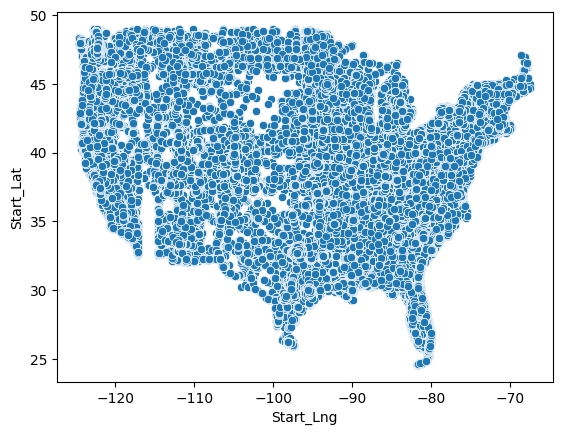

In [ ]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

Mid part USA has less accidents

# Insights and Conclusion
The project analyzed various parameters on accident occurrence and the following insights have been found upon drilling the above parameters:

*The top 5 states by accidents include populous states like California, Florida, Texas, South Carolina and New York.*

*The majority of cities have witnessed upto 100 accidents during the period.*

*Morning(6am to 10am) & evening(3pm to 6pm) rush hours could lead to more accidents*

*During winter months there is sligtly higher number of accidents*

*The weather conditions seem to be “Fair”, “Clear” and “Mostly Cloudy” in most cases.*

*Most accidents happened away from the main crossing where there was inadequate or absence of traffic management infrastructures like traffic signaling systems*

*Mid part USA cities has less accidents*

*Accidents happens to be in areas experiencing temperatures in the range of (50–70) degrees Fahrenheit. Most accidents occur in colder weather or regions.*
